# pandasで前処理

既存のデータを利用してpandasを学習するQiitaの記事より

あとjupyterの練習もかねて

## 使うもの

[データ分析で頻出のPandas基本操作 - Qiita](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)

使用データ:  
[コンペティション詳細／SIGNATE／データ _ SIGNATE - Data Science Competition](https://signate.jp/competitions/24/data)


### 基本操作


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\train.csv')

In [5]:
df.head(5)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [6]:
print('dataframeの行数・列数の確認==>\n', df.shape)
print('\nindexの確認==>\n', df.index)
print('\ncolumnの確認==>\n', df.columns)
print('\ndataframeの各列のデータ型を確認==>\n', df.dtypes)

dataframeの行数・列数の確認==>
 (207, 12)

indexの確認==>
 RangeIndex(start=0, stop=207, step=1)

columnの確認==>
 Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

dataframeの各列のデータ型を確認==>
 datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object


In [7]:
# 任意の列だけ取り出したい場合
df[['name', 'kcal']].head()

,name,kcal
0,厚切りイカフライ,NaN
1,手作りヒレカツ,NaN
2,白身魚唐揚げ野菜あん,NaN
3,若鶏ピリ辛焼,NaN
4,ビッグメンチカツ,NaN


In [8]:
# index指定
df.loc[100]

datetime         2014-4-22
y                       78
week                     火
soldout                  1
name                 マーボ豆腐
kcal                   382
remarks                NaN
event                  NaN
payday                 NaN
weather                  曇
precipitation           --
temperature           18.8
Name: 100, dtype: object

In [9]:
# 1,2,4 行目と 0~1 列目を取得
df.iloc[[1,2,4],[0,2]]

,datetime,week
1,2013-11-19,火
2,2013-11-20,水
4,2013-11-22,金


In [10]:
# 条件指定もできる
df[df['kcal'] > 450]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
45,2014-1-31,92,金,1,メダイ照り焼,460.0,NaN,NaN,NaN,快晴,--,14.1
193,2014-9-9,63,火,0,ハンバーグデミソース,460.0,NaN,NaN,NaN,晴れ,--,26.8


In [11]:
# queryメソッドを使うと、複数条件の指定で、特定カラムだけ出力もできる
df[['name', 'kcal']].query('name.str.contains("豚肉")')

,name,kcal
29,豚肉の生姜焼,462.0
116,豚肉と茄子のピリ辛炒め,406.0
165,豚肉のマスタード焼き,432.0
169,豚肉の生姜焼き,380.0
185,豚肉の胡麻シャブ,396.0
205,豚肉と玉子の炒め,404.0


In [12]:
# 上の絞り込み
df[['name', 'kcal']].query('kcal > 450 and name.str.contains("豚肉")')

,name,kcal
29,豚肉の生姜焼,462.0


#### クエリ指定 query()

[pandas.DataFrameの行を条件で抽出するquery _ note.nkmk.me](https://note.nkmk.me/python-pandas-query/)

----


In [13]:
# 列のデータ確認
df['remarks'].unique()

array([nan, '鶏のレモンペッパー焼（50食）、カレー（42食）', '酢豚（28食）、カレー（85食）', 'お楽しみメニュー',
       '料理長のこだわりメニュー', '手作りの味', 'スペシャルメニュー（800円）'], dtype=object)

In [14]:
# datatime列内で重複確認
print(len(df), len(df['datetime'].unique()))

207 207


In [15]:
# 行方向で重複行を削除
df.drop_duplicates()
print(df.shape)

(207, 12)


In [16]:
# 要約統計量の表示
df.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


----

### データの整形


In [17]:
# datetime列をindexにする
df.set_index('datetime', inplace=True)
df.head()

,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [18]:
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [19]:
# カラム名を変更する (y を sales に変換)
df.rename(columns={'y': 'sales'}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [20]:
# 'sales'列を降順で並び変え
df.sort_values(by="sales", ascending=True).head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
2014-8-1,38,金,0,豚肉の生姜焼き,380.0,NaN,NaN,NaN,薄曇,--,32.7
2014-8-29,39,金,0,チキンの辛味噌焼き,398.0,NaN,NaN,NaN,曇,0,25.1
2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
2014-8-12,40,火,1,厚切ハムカツ,400.0,NaN,NaN,NaN,雨,0,29.4


In [21]:
# sort_values は複数の列に対しても実行できる
df.sort_values(['sales', 'temperature'], ascending=False)[5:10]

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-12-3,153,火,1,厚揚げ豚生姜炒め,NaN,NaN,NaN,NaN,快晴,--,13.9
2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
2013-12-2,151,月,1,マーボ豆腐,NaN,NaN,NaN,NaN,快晴,--,13.8
2013-12-4,151,水,1,クリームチーズ入りメンチ,NaN,NaN,NaN,NaN,晴れ,--,13.5
2013-12-19,151,木,0,ポーク味噌焼き,NaN,NaN,NaN,NaN,雨,0.5,6.8


In [22]:
# indexのデータ型を確認する
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [23]:
# indexのtype変更 object -> datetime64[ns]
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df.index

DatetimeIndex(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21',
               '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27',
               '2013-11-28', '2013-11-29',
               ...
               '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19',
               '2014-09-22', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-29', '2014-09-30'],
              dtype='datetime64[ns]', name='datetime', length=207, freq=None)

#### date文字列はdate型にしておく

Tableauは文字列のままでも自動で日付として取り込んでくれるが、MBでは明示しておく必要がある

これはPythonにおいても同じであり、object型のままだと正しくソートされなかったり、集計できないので困ることになる。

In [24]:
df.sort_index().head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [25]:
# resample()で 日付をもとに集計
df.resample('M').mean() # 月単位の平均値

,sales,soldout,kcal,payday,temperature
datetime,,,,,
2013-11-30,124.600000,0.500000,NaN,NaN,16.060000
2013-12-31,139.722222,0.444444,NaN,1.0,10.844444
2014-01-31,115.222222,0.611111,427.555556,1.0,8.716667
2014-02-28,107.842105,0.526316,420.947368,1.0,7.815789
2014-03-31,89.350000,0.450000,382.157895,1.0,12.505000
2014-04-30,85.761905,0.476190,360.000000,1.0,18.176190
2014-05-31,74.200000,0.550000,419.111111,1.0,22.505000
2014-06-30,67.285714,0.333333,423.315789,1.0,25.409524
2014-07-31,61.363636,0.454545,397.200000,1.0,29.350000


In [28]:
# 新たな日付定義列も作れる
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
df['day'] = list(pd.Series(df.index).apply(lambda x: x.day))

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day
datetime,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22


In [31]:
# cutメソッドでヒストグラムのピン指定的な処理
# ってなんだ？
labels = ['上旬', '中旬', '下旬']
# 0<day≦10, 10<day≦20, 20<day≦31
df['period'] = pd.cut(list(df['day']), bins=[0, 10, 20, 31], labels=labels, right=True)
# これも日付のグループ化の一種
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


----

### 欠損処理

Nan - not a number  
があるともろもろ問題がでる


In [33]:
# 列単位で 欠損地NaNの個数を数える
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [36]:
# １つでもNaNが含まれる行だけを抽出
print(df[df.isnull().any(axis=1)].shape)
df[df.isnull().any(axis=1)].head()

(207, 14)


,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


In [38]:
# 指定した列にあるNaNを'0.0'に置き換える
df.fillna(value={'payday': 0.0}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1,11,22,下旬


In [41]:
# nullの個数を再度確認
df.isnull().sum()['payday']

0

In [43]:
# 'kcal'列に値を持っていない行を削除
df.dropna(subset=['kcal'], axis=0, inplace=True)
print(df.shape)

(166, 14)


In [47]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal               0
remarks          158
event            155
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [52]:
df['precipitation'].unique()

array(['--', '0', '0.5', '1.5', '1', '6', '6.5', '2.5'], dtype=object)

In [54]:
# '--' を 0 に置き換える
df['precipitation'] = df['precipitation'].replace('--', 0).astype(float)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


In [59]:
# mask()の使用例
# 'sales'列が80より大きければ、100とする
pd.DataFrame(df['sales'].mask(df['sales'] > 80, 100)).head()

,sales
datetime,
2014-01-07,100
2014-01-08,100
2014-01-09,100
2014-01-10,100
2014-01-14,100


In [62]:
# remarks（備考）は集計には使えないので列ごと削除
# df.drop(['remarks'], axis=1, inplace=True)
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


#### axis がよくわからん

StackOverflowより
![axis](./axis.jfif)

axis=0 は列に対する操作。行が残る  
axis=1 は行に対する操作。列が残る


----

### 集計


In [64]:
# 天気列を集計
df['weather'].value_counts()

曇     44
晴れ    41
快晴    34
薄曇    23
雨     22
雷電     1
雪      1
Name: weather, dtype: int64

In [66]:
# 列ごとに売り切れ数をカウント
df.groupby(['week'])['soldout'].count()

week
月    34
木    37
水    37
火    35
金    23
Name: soldout, dtype: int64

In [68]:
# 複数列のグループ化
# 月と上で追加したperiod毎にsales数の合計
df.groupby(['month', 'period'])['sales'].sum()

month  period
1      上旬         475
       中旬         581
       下旬        1018
2      上旬         725
       中旬         715
       下旬         609
3      上旬         614
       中旬         698
       下旬         369
4      上旬         792
       中旬         344
       下旬         457
5      上旬         316
       中旬         406
       下旬         517
6      上旬         467
       中旬         440
       下旬         311
7      上旬         460
       中旬         277
       下旬         406
8      上旬         288
       中旬         250
       下旬         334
9      上旬         468
       中旬         249
       下旬         234
Name: sales, dtype: int64

In [70]:
# 気温 avg
df.groupby(['weather'])['temperature'].mean()

weather
快晴    15.294118
晴れ    22.558537
曇     19.377273
薄曇    23.926087
雨     18.813636
雪      1.200000
雷電    19.000000
Name: temperature, dtype: float64

In [72]:
# diff()で気温差を出す
df['temperature_diff'] = df['temperature'].diff(periods=1)
df[['temperature', 'temperature_diff']].head()

,temperature,temperature_diff
datetime,,
2014-01-07,7.3,NaN
2014-01-08,9.8,2.5
2014-01-09,10.9,1.1
2014-01-10,5.1,-5.8
2014-01-14,5.8,0.7


In [74]:
# 気温列を区間3で移動平均
df['temperature_rolling_mean'] = df['temperature'].rolling(window=3).mean()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean']].head()

,temperature,temperature_diff,temperature_rolling_mean
datetime,,,
2014-01-07,7.3,NaN,NaN
2014-01-08,9.8,2.5,NaN
2014-01-09,10.9,1.1,9.333333
2014-01-10,5.1,-5.8,8.600000
2014-01-14,5.8,0.7,7.266667


In [76]:
df['temperature_pct_change'] = df['temperature'].pct_change()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change']].head()

,temperature,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,
2014-01-07,7.3,NaN,NaN,NaN
2014-01-08,9.8,2.5,NaN,0.342466
2014-01-09,10.9,1.1,9.333333,0.112245
2014-01-10,5.1,-5.8,8.600000,-0.532110
2014-01-14,5.8,0.7,7.266667,0.137255


#### 移動平均

区間nで区切った平均を、ずらしながら計算すること  
区間はウインドウとも呼ぶ

In [79]:
# 上の気温関係の列にNaNがある行を削除
df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

In [81]:
# 削除確認
df.isnull().sum()

sales                         0
week                          0
soldout                       0
name                          0
kcal                          0
event                       153
payday                        0
weather                       0
precipitation                 0
temperature                   0
month                         0
day                           0
period                        0
temperature_diff              0
temperature_rolling_mean      0
temperature_pct_change        0
dtype: int64

In [83]:
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,,,,,,,,,,,,,
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333,0.112245
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000,-0.532110
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667,0.137255
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000,-0.500000
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333,1.413793


----

### 可視化

matplotlibがよく使われるが、定型処理ならばpandasでも可


In [86]:
# jupyter notebook内でmatplotlibを使う
%matplotlib inline
import matplotlib.pyplot as plt

# プロットスタイルの変更
plt.style.use('ggplot')

In [90]:
# 日本語フォントの設定
from matplotlib.font_manager import FontProperties
font_path = 'C:\\Windows\\Fonts\\TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)

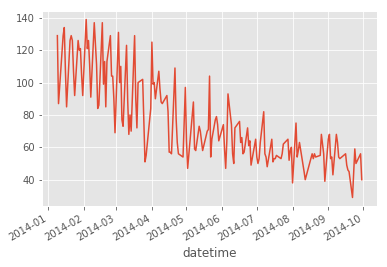

In [92]:
# 折れ線描写
df['sales'].plot()

分かること
- 売上は右肩下がり

Text(0.5, 1.0, '気温変化に関する図')

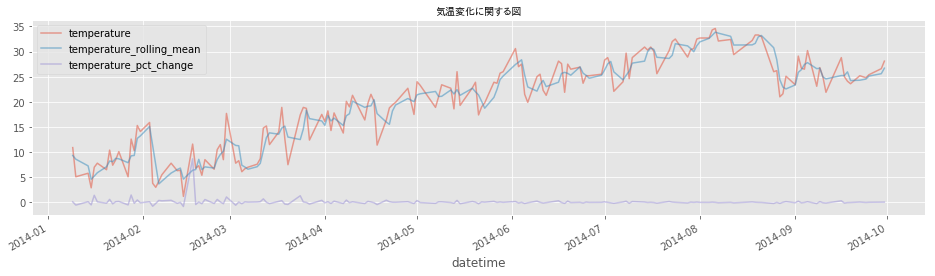

In [98]:
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'], figsize=(16,4), alpha=0.5)
# fontpropertiesは日本語表示に必要
plt.title('気温変化に関する図', fontproperties=font_prop)

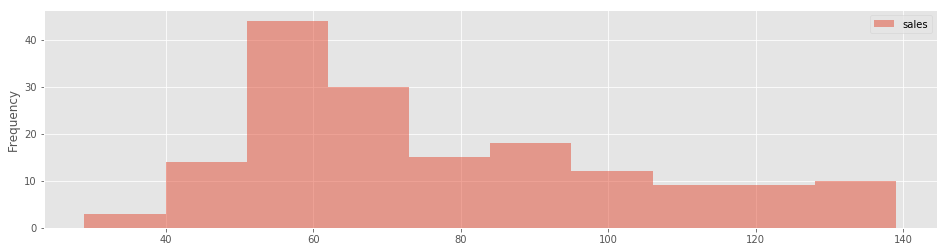

In [99]:
# ヒストグラム
df.plot(kind='hist', y='sales',  )

分かること
- 60個程度売れる日が多い
- 最大で140個程売れる日もある

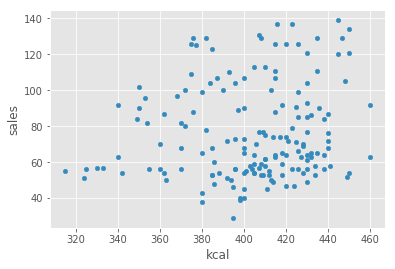

In [101]:
# 散布図
df.plot(kind='scatter', x='kcal', y='sales')

分かること
- 売上個数とカロリーに相関は無さそう

In [107]:
# 相関係数はメソッドが用意されている
df[['kcal', 'sales']].corr()

,kcal,sales
kcal,1.000000,0.129521
sales,0.129521,1.000000


In [109]:
# 気温と売り上げに相関はあるかな？
df[['sales', 'temperature']].corr()

,sales,temperature
sales,1.000000,-0.770651
temperature,-0.770651,1.000000


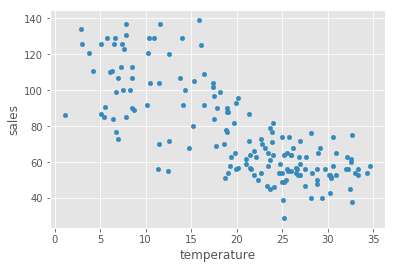

In [111]:
df.plot(kind='scatter', x='temperature', y='sales')

負の相関があるように見えるけど…
これが有意な関連なのか判断付かん


In [112]:
# 複雑な例
# 月別・期間別の売上個数の状況を可視化したい
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period,上旬,中旬,下旬
month,,,
1,216,581,1018
2,725,715,609
3,614,698,369
4,792,344,457
5,316,406,517
6,467,440,311
7,460,277,406
8,288,250,334
9,468,249,234


pivot()で大体何でもできそう

Text(0.5, 1.0, '月別・期間別の売上個数')

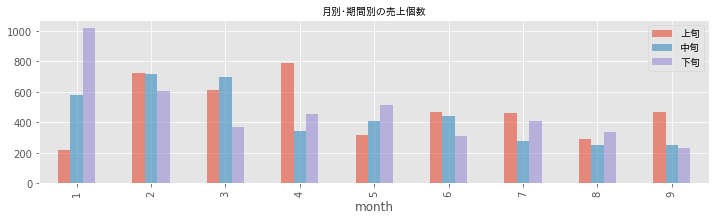

In [114]:
# 棒グラフ
pivot_monthly_df.plot(kind='bar', alpha=0.6, figsize=(12,3)).legend(prop=font_prop)
plt.title('月別・期間別の売上個数', fontproperties=font_prop)

わかること
- 1月下旬は売上増
- ４月上旬も売上増
- 月が進むと期間に関係なく減少傾向

----

### 変数の前処理

#### dummy化とは

文字列で表現されているデータ（天候など）を計算可能にしたい  
↓  
数値表現（one-hotベクトル化とも呼ぶ）


In [116]:
# 現在のcokumnを確認
print(df.columns)
print(len(df.columns))

Index(['sales', 'week', 'soldout', 'name', 'kcal', 'event', 'payday',
       'weather', 'precipitation', 'temperature', 'month', 'day', 'period',
       'temperature_diff', 'temperature_rolling_mean',
       'temperature_pct_change'],
      dtype='object')
16


In [118]:
# テキストデータが入っている列全て（！）をdummy化する
dummy_df = pd.get_dummies(df, columns=['week', 'name', 'event', 'weather', 'period'])
dummy_df.head()

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,...,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,...,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,...,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,...,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,...,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,...,1,0,0,0,0,0,0,0,1,0


In [120]:
# 上は省略表示なので、指定した数の列数を強制表示する
pd.set_option('display.max_columns', 160)

In [122]:
print(dummy_df.shape)
dummy_df.head()

(164, 157)


,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,temperature_pct_change,week_月,week_木,week_水,week_火,week_金,name_いか天ぷら,name_かじきの甘辛煮,name_きのこソースハンバーグ,name_さわら焼味噌掛け,name_さんま辛味焼,name_たっぷりベーコンフライ,name_ぶりレモンペッパー焼き,name_ますのマスタードソース,name_アジ唐揚げ南蛮ソース,name_エビフライ,name_カレイの唐揚げ,name_カレイ唐揚げ 甘酢あん,name_カレイ唐揚げ夏野菜あん,name_カレイ唐揚げ野菜あんかけ,name_カレイ唐揚げ野菜餡かけ,name_カレイ野菜あんかけ,name_キスと野菜の天ぷら,name_キーマカレー,name_ゴーヤチャンプルー,name_サバ焼味噌掛け,name_サーモンのムニエル2色ソース,name_サーモンフライ・タルタル,name_ジャンボチキンカツ,name_ジューシーメンチカツ,name_タンドリーチキン,name_チキンのコーンクリーム焼き,name_チキンの辛味噌焼き,name_チキンクリームシチュー,name_チキンステーキ・きのこソース,name_チキンフリカッセ,name_チキン南蛮,name_チキン香草焼きマスタードソース,name_チャプチェ,name_チンジャオロース,name_チーズハンバーグ,name_チーズメンチカツ,name_チーズ入りハンバーグ,name_チーズ入りメンチカツ,name_ハンバーグカレーソース,name_ハンバーグケッチャップソース,name_ハンバーグデミソース,name_ハンバーグ和風きのこソース,name_ハンバーグ（デミきのこバター）,name_バーベキューチキン,name_ビーフカレー,name_ビーフシチュー,name_ビーフストロガノフ,name_ビーフトマト煮,name_プルコギ,name_ホタテクリ―ムシチュー,name_ボローニャ風カツ,name_ポークソテー韓国ソース,name_ポークハヤシ,name_ポーク生姜焼き,name_マーボ茄子,name_マーボ豆腐,name_メダイ照り焼,name_メンチカツ,name_ロース甘味噌焼き,name_八宝菜,name_厚切イカフライ,name_厚切ハムカツ,name_名古屋味噌カツ,name_和風ソースハンバーグ,name_和風ハンバーグ,name_回鍋肉,name_手作りひれかつ,name_手作りひれかつとカレー,name_手作りチキンカツ,name_手作りトンカツ,name_手作りロースカツ,name_洋食屋さんのメンチカツ,name_海老クリーミ―クノーデル,name_海老フライとホタテ串カツ,name_海老フライタルタル,name_炊き込みご飯,name_牛すき焼き風,name_牛カルビ焼き肉,name_牛スキヤキ,name_牛丼風煮,name_牛肉すき焼き風,name_牛肉コロッケ,name_牛肉ニンニクの芽炒め,name_牛肉筍煮,name_白身魚のマスタード焼き,name_白身魚の南部焼き,name_白身魚フライ,name_白身魚ムニエル,name_白身魚唐揚げ野菜あんかけ,name_白身魚唐揚げ野菜餡かけ,name_筑前煮,name_肉じゃが,name_肉団子のシチュー,name_肉団子クリームシチュー,name_親子煮,name_豚すき焼き,name_豚の冷しゃぶ,name_豚キムチ炒め,name_豚ロースのピザ風チーズ焼き,name_豚冷シャブ野菜添え,name_豚味噌メンチカツ,name_豚肉と玉子の炒め,name_豚肉と茄子のピリ辛炒め,name_豚肉のマスタード焼き,name_豚肉の生姜焼き,name_豚肉の胡麻シャブ,name_越冬キャベツのメンチカツ,name_酢豚,name_酢豚orカレー,name_青梗菜牛肉炒め,name_青椒肉絲,name_鶏のから揚げねぎ塩炒めソース,name_鶏のから揚げスイートチリソース,name_鶏のカッシュナッツ炒め,name_鶏のトマトシチュー,name_鶏のピリ辛焼き,name_鶏のレモンペッパー焼orカレー,name_鶏の味噌漬け焼き,name_鶏の唐揚げ,name_鶏の唐揚げおろしソース,name_鶏の塩から揚げ,name_鶏の天ぷら,name_鶏の照り焼きマスタード,name_鶏の照り焼きマヨ,name_鶏の親子煮,name_鶏チリソース,name_鶏肉とカシューナッツ炒め,name_鶏肉のカレー唐揚,name_鶏肉の山賊焼き,event_キャリアアップ支援セミナー,event_ママの会,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,0.112245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,-0.532110,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,0.137255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,-0.500000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,1.413793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

----

ここでひとまず完了。

CSVに吐き出す。


In [126]:
# utf-8で保存
dummy_df.to_csv('D:\\sql\\processed_datamart.csv', encoding='utf-8')

----

## 分析の流れ

- モデリング
    - `sales` を**目的変数**、それ以外の列を**説明変数**として、  
      目的変数を予測するモデルを作成する
- 特徴量エンジニアリング
    - より目的変数に**効く**説明変数を探す（作る）こと

>pandasを使った前処理とは、NaNや無関係な説明変数を削除しつつ、"効く"特徴量を探す（作成する）作業のこと

データ分析のほとんどの時間はここに費やされる。

データをBIに使う場合でも、何らかの特徴量が無いとわざわざ視覚化する意味が薄れる